In [1]:
import rebound as re
import reboundx as rex
import numpy as np
import matplotlib.pylab as plt

In [2]:
sim = re.Simulation()
sim.integrator = "whfast"
sim.add(m=1)
sim.add(m=3e-5,a=1)            #10 Earth mass
sim.add(m=3e-7,P=np.pi*2*3.8)  #0.1 Earth mass
sim.move_to_com()
ps = sim.particles
sim.dt = ps[1].P/200 # timestep

rebx = rex.Extras(sim)
mod_effect = rebx.load_force("exponential_migration")  # Add the migration force
rebx.add_force(mod_effect)  # Add the migration force
sim.particles[2].params["em_aini"] = ps[2].a  # parameter 1: initial semimajor axis
sim.particles[2].params["em_afin"] = ps[1].a*1.3  # parameter 2: final semimajor axis
sim.particles[2].params["em_tau_a"] = 1e4  # parameter 3: the migration e-folding time

In [3]:
phi=[]
per=[]
sma=[]
tarr = np.linspace(0,12e4,4000)
for k,time in enumerate(tarr):
    sim.integrate(time)
    ps = sim.particles
    phi1 = (3*ps[2].l-2*ps[1].l-ps[1].pomega)%(2*np.pi)
    phi2 = (3*ps[2].l-2*ps[1].l-ps[2].pomega)%(2*np.pi)
    phi.append([phi1,phi2])
    per.append([ps[1].P,ps[2].P])
    sma.append([ps[1].a,ps[2].a])
    
phi=np.array(phi)
per=np.array(per)
sma=np.array(sma)

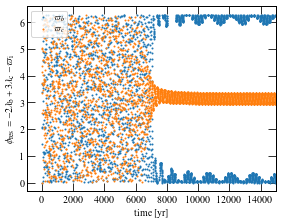

In [4]:
fg, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(tarr/np.pi/2,phi[:,0],'.',label=r'$\varpi_b$', ms=2)
ax.plot(tarr/np.pi/2,phi[:,1],'.',label=r'$\varpi_c$', ms=2)
#plt.ylim(0,2*np.pi)
ax.set_xlabel('time [yr]')
text=r'$\phi_\mathrm{res}=\mathrm{-2\lambda_{\mathrm{b}}+3\lambda_{\mathrm{c}}-\varpi_i}$'
ax.set_ylabel(text)
ax.set_xlim(xmax=1.5e4)
ax.legend(loc=2)
fg.savefig('lib-angle.png', dpi=192)

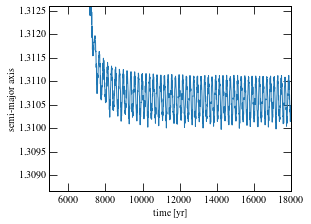

In [5]:
fg, ax = plt.subplots(1,1,figsize=(4,3))
sma1 = sma[:,1]
sma0 = sma[:,0]
ax.plot(tarr/(2*np.pi),sma1,'-')
ax.plot(tarr/(2*np.pi),sma0,'-')
ax.set_xlabel('time [yr]')
ax.set_ylabel('semi-major axis')
ax.set_xlim(0,1.5e4)
fg.savefig('lib-sma.png', dpi=192)
ax.set_xlim(5e3,1.8e4)
ax.set_ylim(0.999*sma1.min(),1.002*sma1.min())
fg.subplots_adjust(left=0.15)
fg.savefig('lib-sma-zoom.png', dpi=192)

In [6]:
sma[:,0]

array([1.        , 0.99999994, 0.99999999, ..., 0.99993862, 0.99993989,
       0.9999404 ])